In [ ]:
# decision-tree-algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.iloc[:,:-1].value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
1           337        118          4                  4.5  4.5   9.65  1           1
330         297        96           2                  2.5  1.5   7.89  0           1
343         308        106          3                  3.0  3.0   8.24  0           1
342         326        110          3                  3.5  3.5   8.76  1           1
341         312        107          3                  3.0  3.0   8.46  1           1
                                                                                   ..
162         298        99           1                  1.5  3.0   7.46  0           1
161         315        103          1                  1.5  2.0   7.86  0           1
160         297        100          1                  1.5  2.0   7.90  0           1
159         306        106          2                  2.0  2.5   8.14  0           1
500         327        113          4                  4.5 

In [ ]:
df.shape

(500, 9)

In [ ]:
fig = px.histogram(df, x='GRE Score', nbins=20, title='GRE Score Distribution',labels={'GRE Score': 'GRE Score'}, template='plotly_dark')
fig.show()

In [ ]:
fig = px.bar(df, x='TOEFL Score', title='TOEFL Score', color='TOEFL Score',template='plotly_dark')
fig.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.006367
R^2 Score: 0.6285685450585965


In [ ]:
!pip install pydotplus

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
from six import StringIO

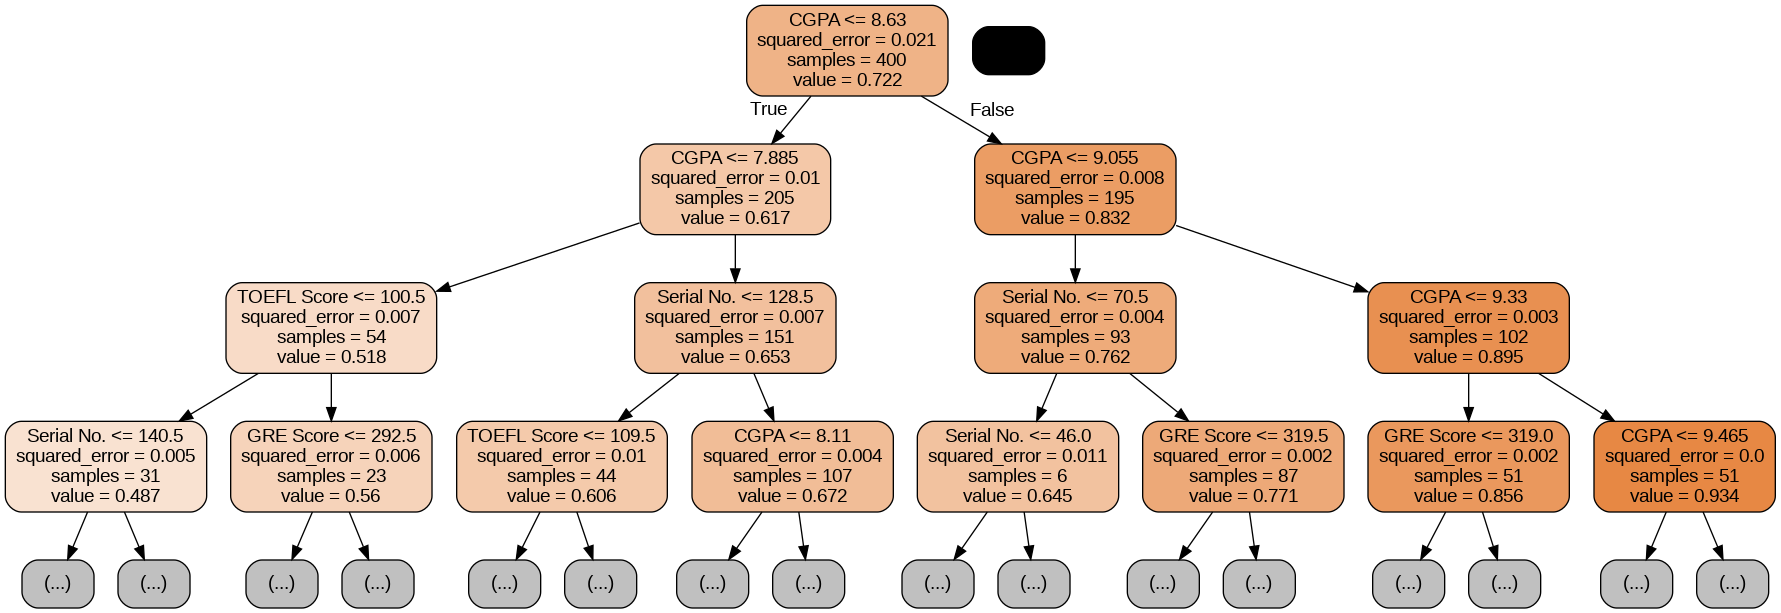

In [ ]:
from IPython.display import Image
# Export the decision tree as a dot file
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, max_depth=3)  # Adjust max_depth as needed

# Convert dot data to a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the decision tree as an image file
graph.write_png('decision_tree.png')

# Display the decision tree
Image(graph.create_png())

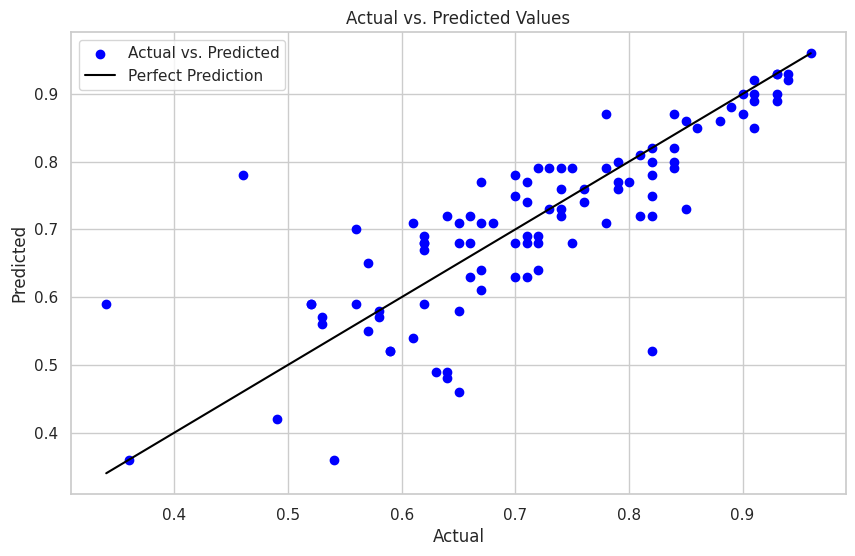

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()